
Handling for missing entries
Data types and formats that should be chaged
Univariate analysis of the feature
Bivariate anlaysis of the feature

In [33]:
import imp
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import datetime
import math
import calendar

In [2]:
sys.path.append('../')
from scripts.missing_info import MissingValue
miss_val = MissingValue()

In [3]:
# import datasets
df_train = pd.read_csv('../data/train.csv',)
df_test = pd.read_csv('../data/test.csv')
df_store = pd.read_csv('../data/store.csv')

train= pd.read_csv('../data/train.csv',parse_dates=["Date"], 
                 index_col=["Date"])

/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_1330/4138280627.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../data/train.csv',)
/var/folders/pr/k1cjyyh56sv6wyyxm023snx00000gn/T/ipykernel_1330/4138280627.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train= pd.read_csv('../data/train.csv',parse_dates=["Date"],


In [106]:
miss_val.val_miss_percntage(df_store)

(11150,
 Store                          0
 StoreType                      0
 Assortment                     0
 CompetitionDistance            3
 CompetitionOpenSinceMonth    354
 CompetitionOpenSinceYear     354
 Promo2                         0
 Promo2SinceWeek              544
 Promo2SinceYear              544
 PromoInterval                544
 dtype: int64,
 2343)

In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [17]:
df_train['Date'].min()

'2013-01-01'

In [18]:
df_train['Date'].max()

'2015-07-31'

In [5]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [6]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


<b>`Data eploration for the sales for df_train`<b>

Joining

In [34]:
df_train.Store.nunique() == df_store.Store.nunique()

True

In [37]:
df = df_train.merge(df_store, how='left', left_on=df_train.Store, right_on=df_store.Store)
df.drop(['key_0', 'Store_y'], axis=1, inplace=True)
df = df.rename(columns={'Store_x':'Store'})
print(df.shape)
df

(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


<b>`Understanding the Data`<b>

In [38]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


- There are in total 1115 stores
- sales feature having 3849.93 volatility and
- feature customers having 464.41 volatility 
- with a mean of 57773.82 and 633.15 respectively.

In [39]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

In [40]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 11)

There are no duplicates and Testing dataset has 11 null values.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# no missing values for this datase
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<b>`Exploratory Data Analysis`<b>

<b>`Univariate time series data deals with one variable`<b>

In [41]:
# get the start and end time of our data
print("Training data starts from: {}".format(df_train.Date.min()))
print("Training data end on: {}".format(df_train.Date.max()))
print()
print("Testing data starts from: {}".format(df_test.Date.min()))
print("Testing data end on: {}".format(df_test.Date.max()))

Training data starts from: 2013-01-01
Training data end on: 2015-07-31

Testing data starts from: 2015-08-01
Testing data end on: 2015-09-17


In [42]:
df.Date = pd.to_datetime(df.Date)
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

* explore seasonality and trend in the dataset
* engineer and pre-process features with the analysis I perform.

In [43]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015


<AxesSubplot:ylabel='CompetitionOpenSinceMonth'>

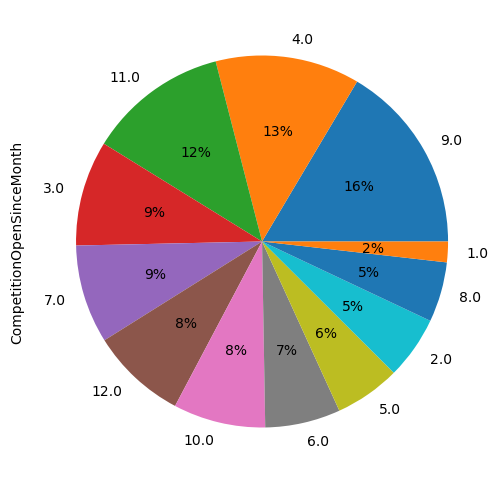

In [85]:
df['CompetitionOpenSinceMonth'].value_counts().plot(kind='pie',
                                    y='CompetitionOpenSinceMonth',autopct='%1.0f%%',
                            figsize=(6, 7))

<b>`Bivariate time series data deals with one variable`<b>

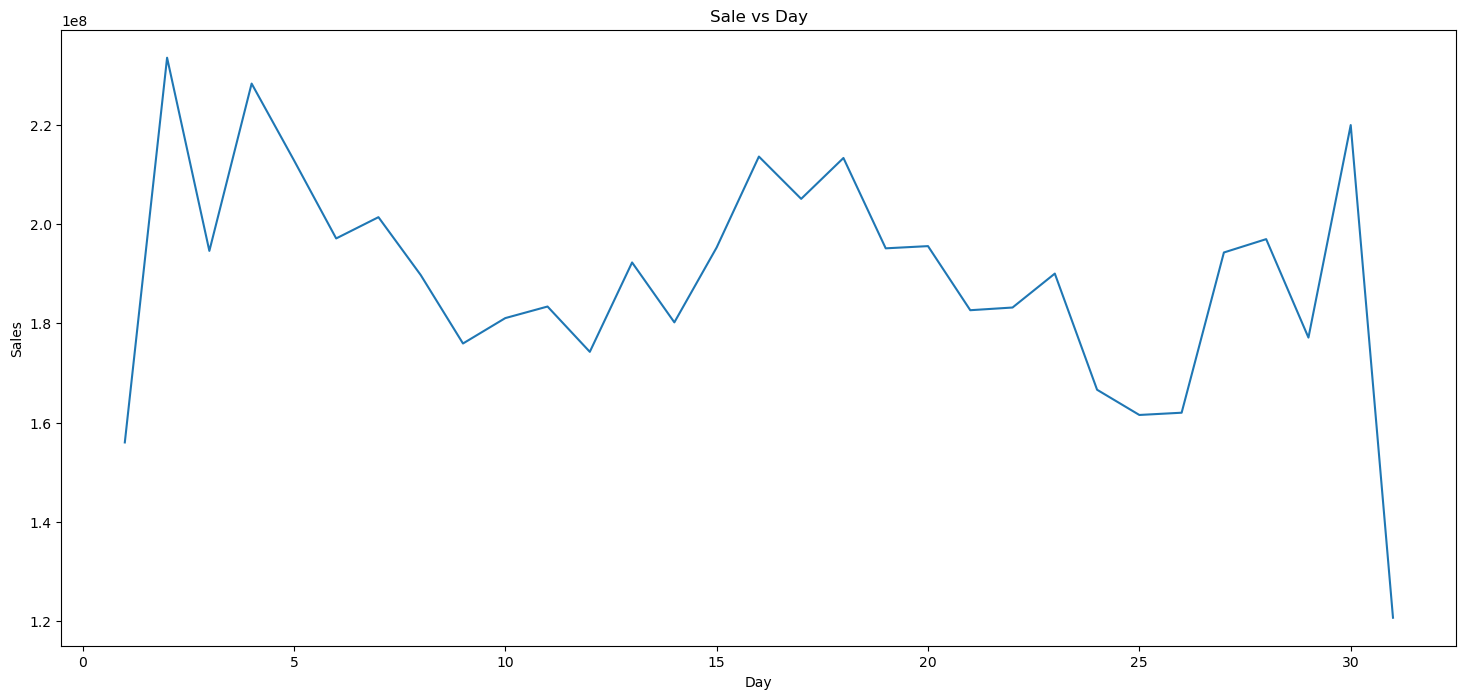

In [44]:
plt.figure(figsize=(18,8))
plt.plot(df.groupby(df.Day).sum().Sales)
plt.title("Sale vs Day")
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

Most Sales are done in the beginning of the month with end of the month being the lowest.

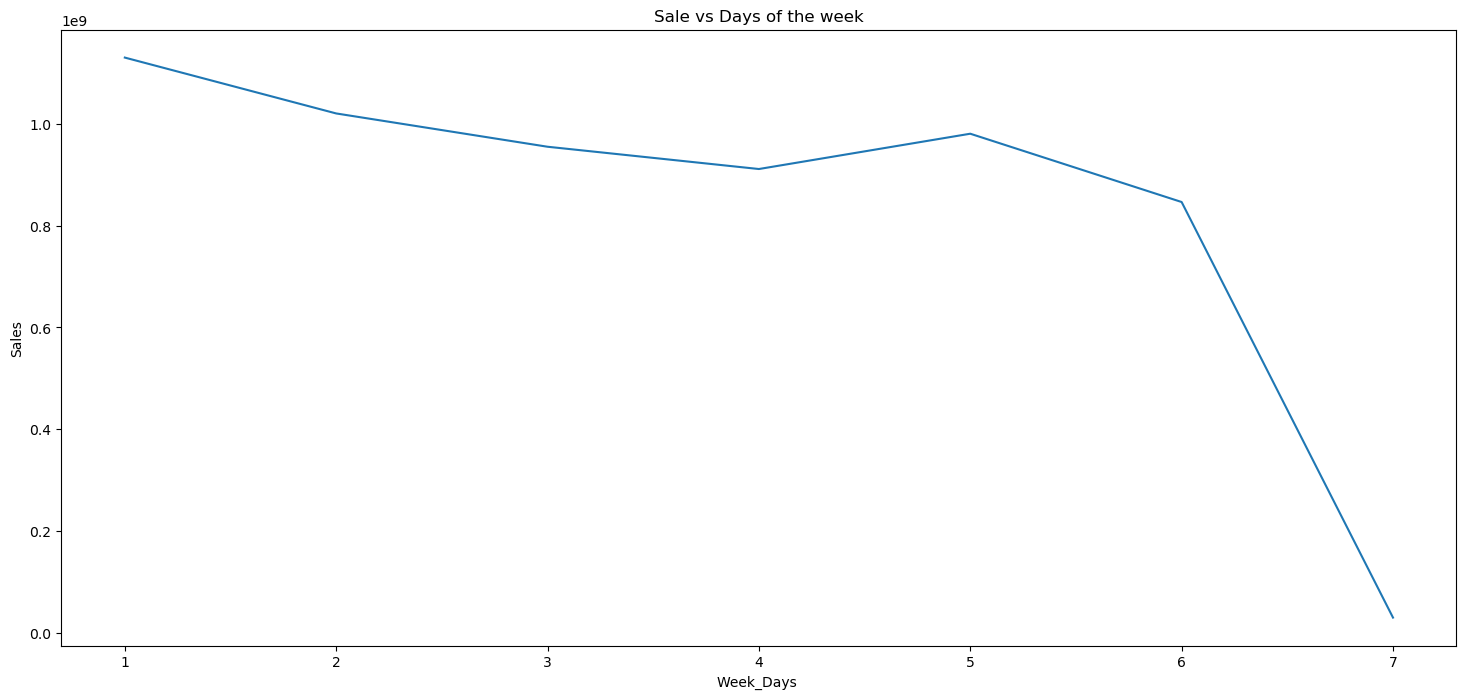

In [50]:
plt.figure(figsize=(18,8))
plt.plot(df.groupby(df.DayOfWeek).sum().Sales)
plt.title("Sale vs Days of the week")
plt.xlabel('Week_Days ')
plt.ylabel('Sales')
plt.show()

Sales are more in the beginning of the week than the end

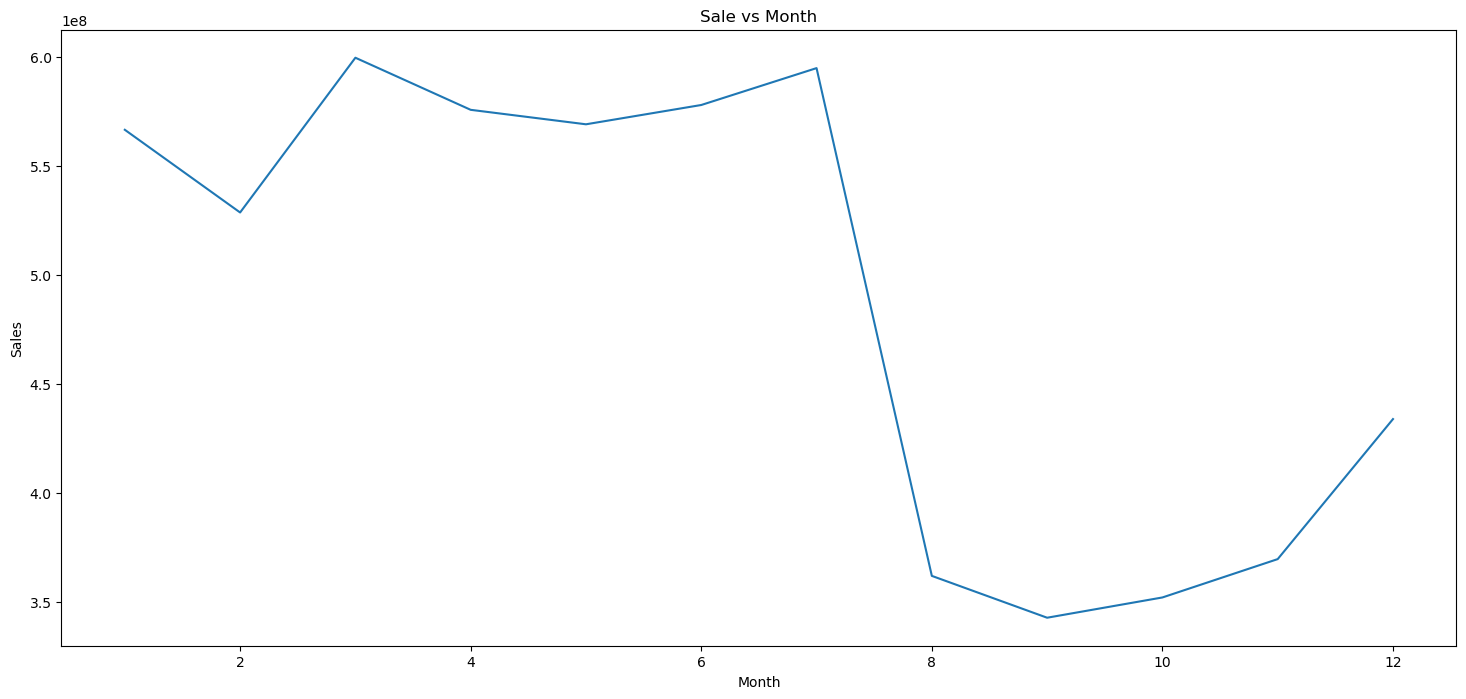

In [48]:
plt.figure(figsize=(18,8))
plt.plot(df.groupby(df.Month).sum().Sales)
plt.title("Sale vs Month")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

Sales relatively are lower by the end of year.

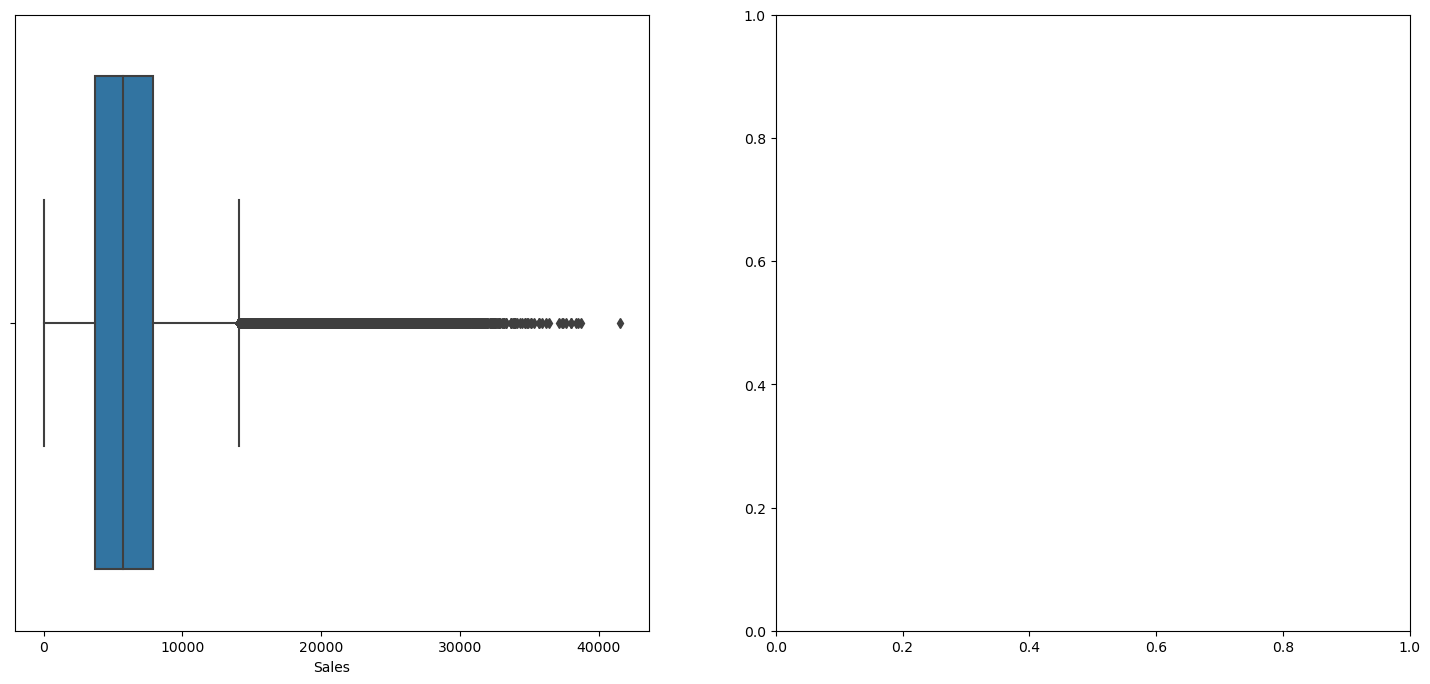

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
sns.boxplot(train.Sales, ax=ax1)
# sns.kdeplot(train.Sales, ax=ax2)
plt.show()

Sales are 0 on a huge amount of days which could mean this is either imputed to fill gaps as it doesn't make sense for sale of a day to be 0. It could mean the store was closed, maybe there was a holiday. Lets see if this stands.

In [61]:
miss_val.missing_values_table(df)

,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,508031,49.9,float64
Promo2SinceYear,508031,49.9,float64
PromoInterval,508031,49.9,object
CompetitionOpenSinceMonth,323348,31.8,float64
CompetitionOpenSinceYear,323348,31.8,float64
CompetitionDistance,2642,0.3,float64


In [56]:
df[df.Open==0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

- 172817 values are filled with 0. 
- fill these values with np.NaN as some models like XGBoost can handle missing values and it might benifit from it.

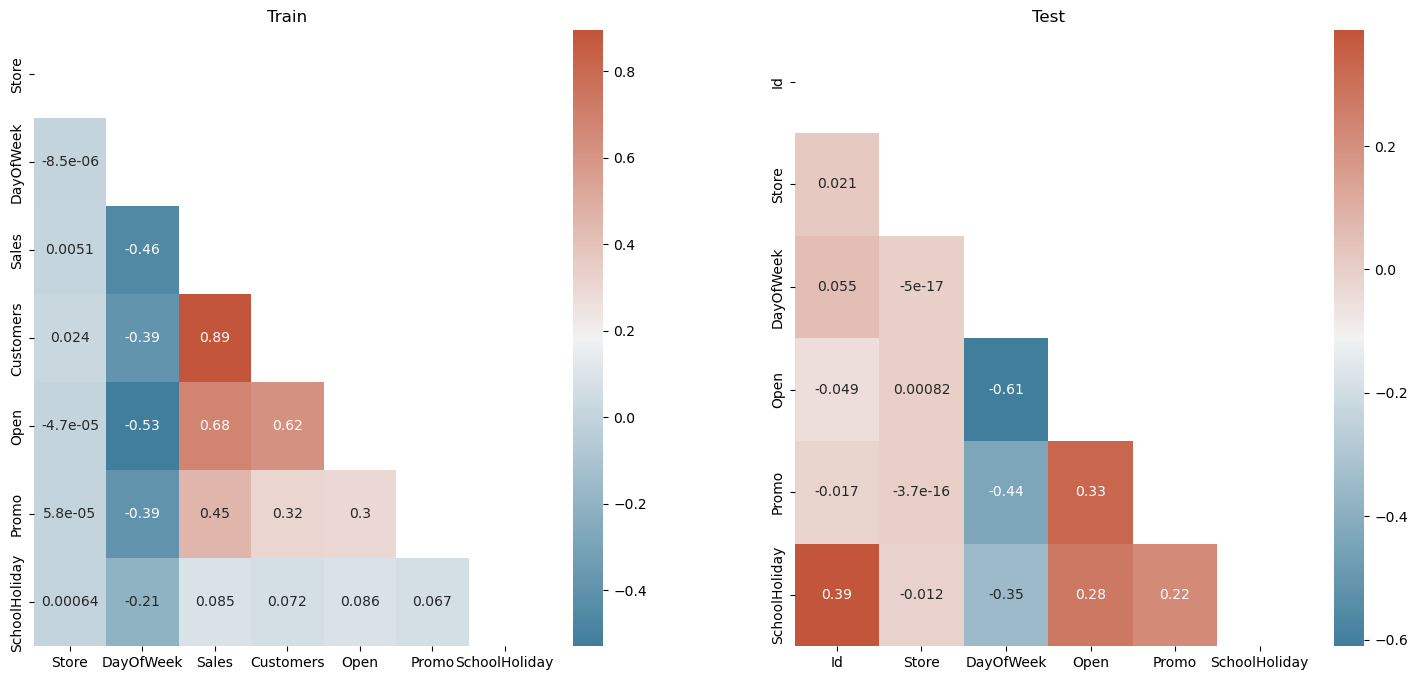

In [62]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(train.corr(), mask=mask, cmap=cmap, annot=True, ax=ax1)
ax1.set_title('Train')
corr = df_test.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df_test.corr(), mask=mask, cmap=cmap, annot=True, ax=ax2)
ax2.set_title('Test')
plt.show()

Sales are highly correlated with feature Customers and feature Open and moderately correlated with Promo. Lets see some more plots about this!

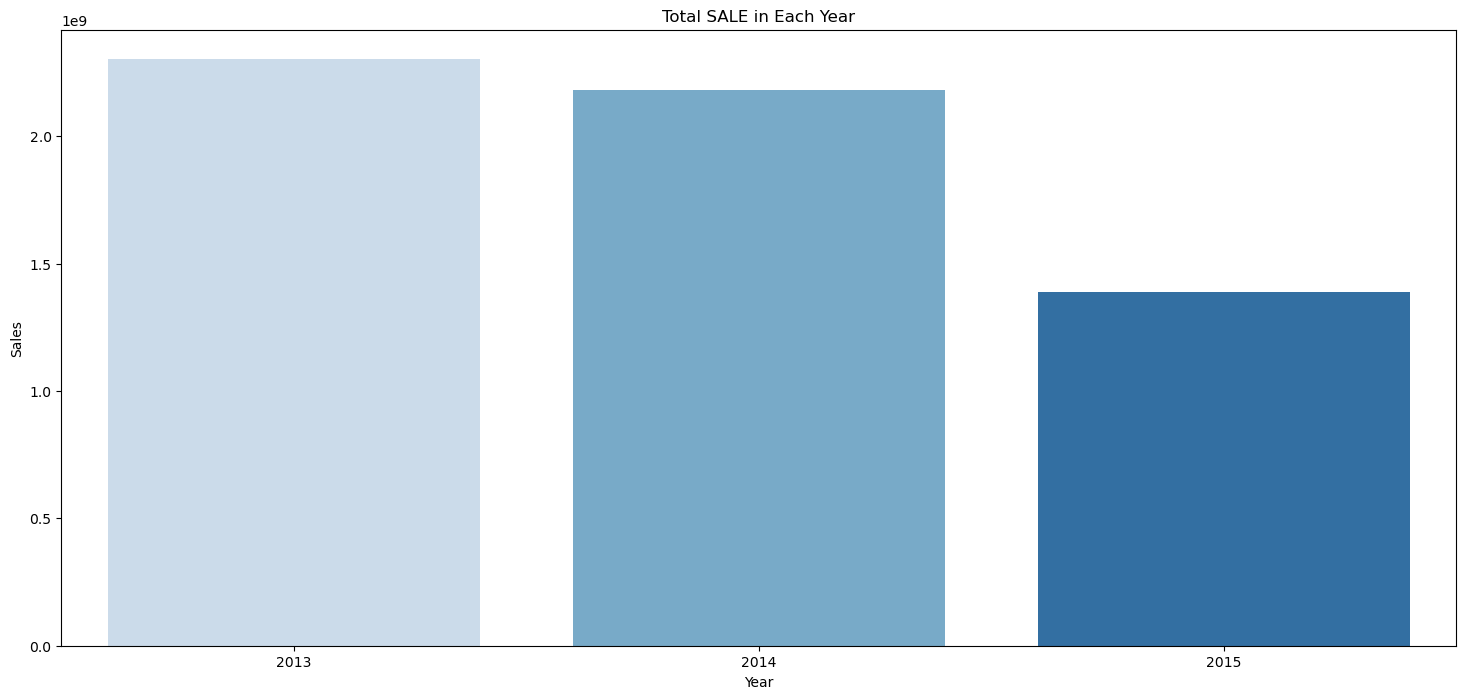

In [65]:
plt.figure(figsize=(18,8))
temp_df = df.groupby(df.Year).sum()
sns.barplot(temp_df.index, temp_df.Sales, palette='Blues')
plt.title("Total SALE in Each Year")
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

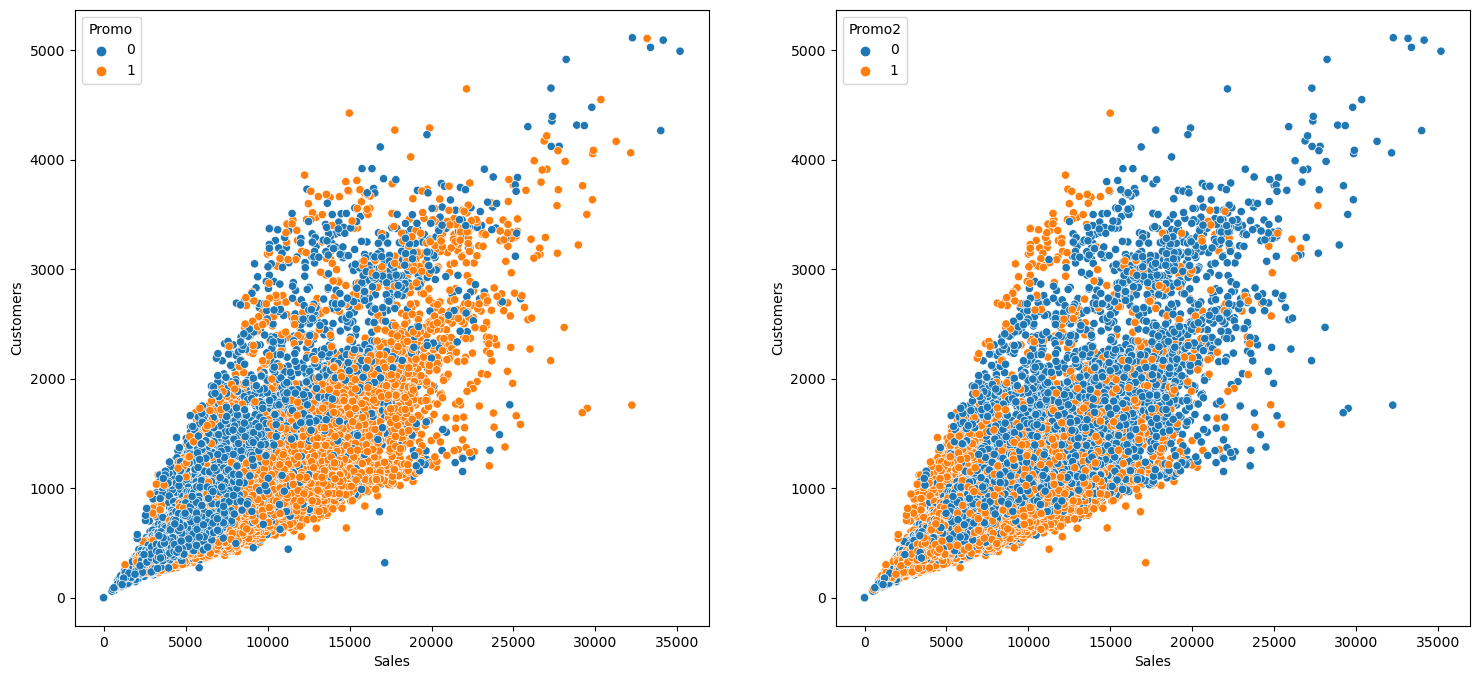

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
temp_df = df.sample(100000)
sns.scatterplot(temp_df.Sales, temp_df.Customers, hue=df.Promo, ax=ax1)
sns.scatterplot(temp_df.Sales, temp_df.Customers, hue=df.Promo2, ax=ax2)
plt.show()

Seems like Promo1 was more successful for the stores! Lets check the Sales for each promo on average.

In [67]:
df.groupby(df.Promo).Sales.mean()[1] > df.groupby(df.Promo2).Sales.mean()[1] #1 means store participated

True

Lets see if the type of store is a significant feature! Intuitively, stores inventory and ambience should be a huge factor.

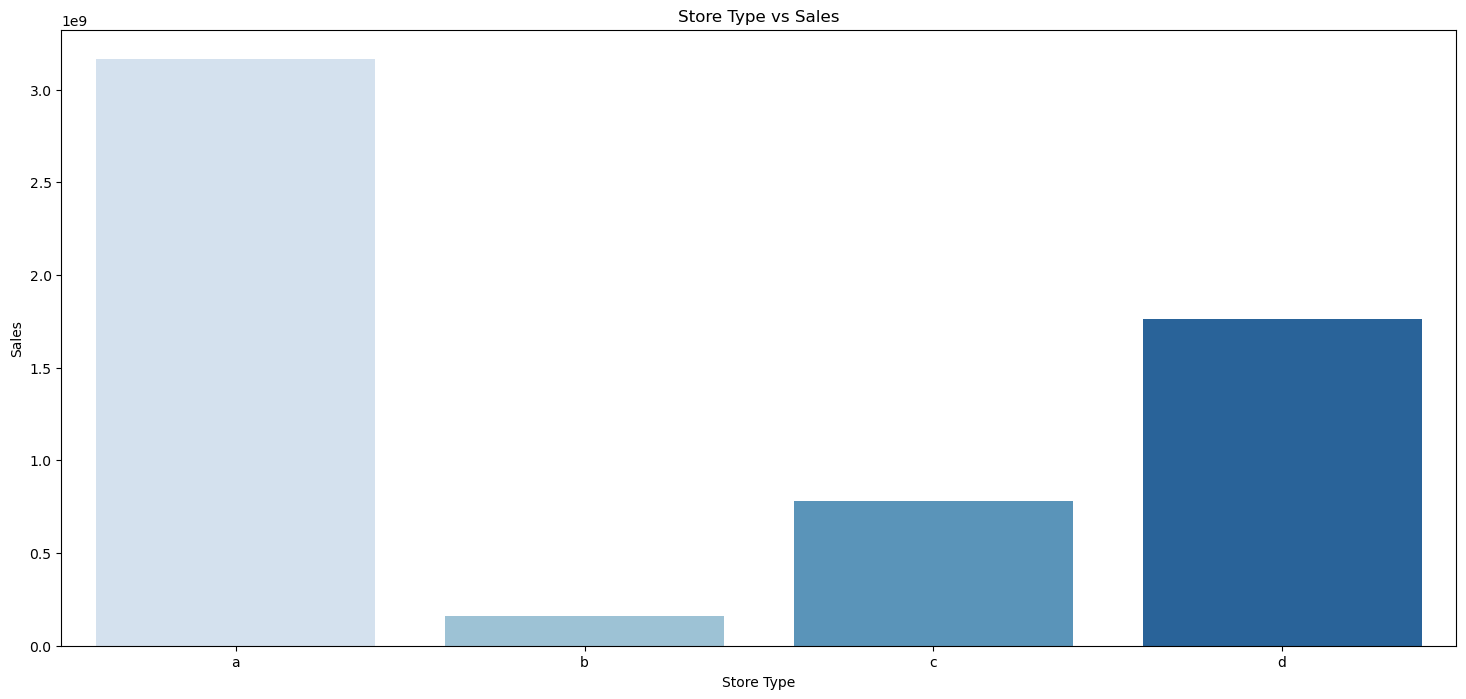

In [68]:
plt.figure(figsize=(18,8))
storetype_df = df.groupby(df.StoreType).sum()
sns.barplot(storetype_df.index, storetype_df.Sales, palette='Blues')
plt.title("Store Type vs Sales")
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

In [76]:
# group by store type
storetype_df = df.groupby(df.StoreType).count()
storetype_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
StoreType,,,,,,,,,,,,,,,,,,,,
a,551627,551627,551627,551627,551627,551627,551627,551627,551627,551627,550685,390067,390067,551627,257886,257886,257886,551627,551627,551627
b,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,15830,8478,8478,15830,4526,4526,4526,15830,15830,15830
c,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,136840,98954,98954,136840,68258,68258,68258,136840,136840,136840
d,312912,312912,312912,312912,312912,312912,312912,312912,312912,312912,311212,196362,196362,312912,178508,178508,178508,312912,312912,312912


Explore the reason the store a is dominant

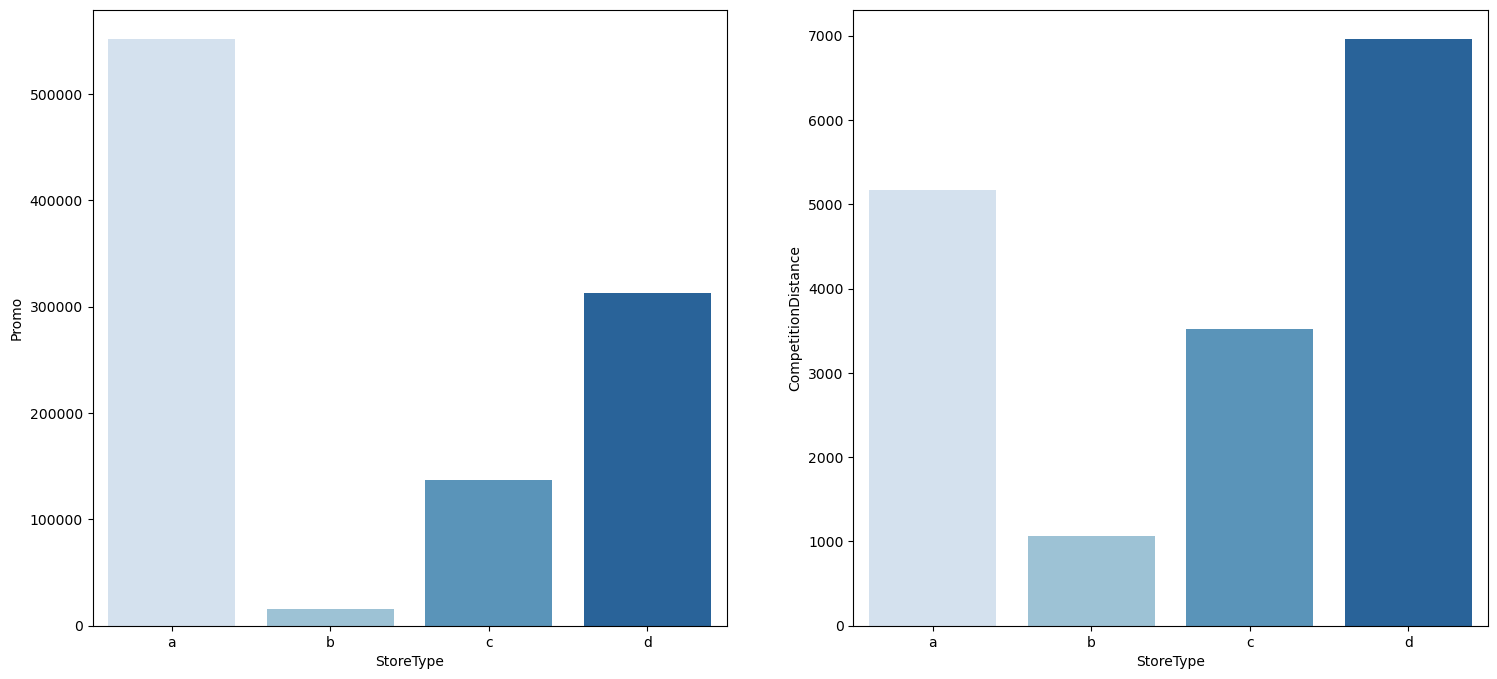

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
storetype_df = df.groupby(df.StoreType).count()
sns.barplot(storetype_df.index, storetype_df['Promo'], ax=ax1, palette='Blues')
storetype_df = df.groupby(df.StoreType).mean()
sns.barplot(storetype_df.index, storetype_df['CompetitionDistance'], ax=ax2, palette='Blues')
plt.show()

Store A did the most Promo'1's inspite of being on average top second in comparison to other stores with regard to Competition Distance (distance in meters to the nearest competitor store). Hence, I think it is fair to say promos are a big deal. Other factors could be seasonality, trend etc. Lets see about trend!

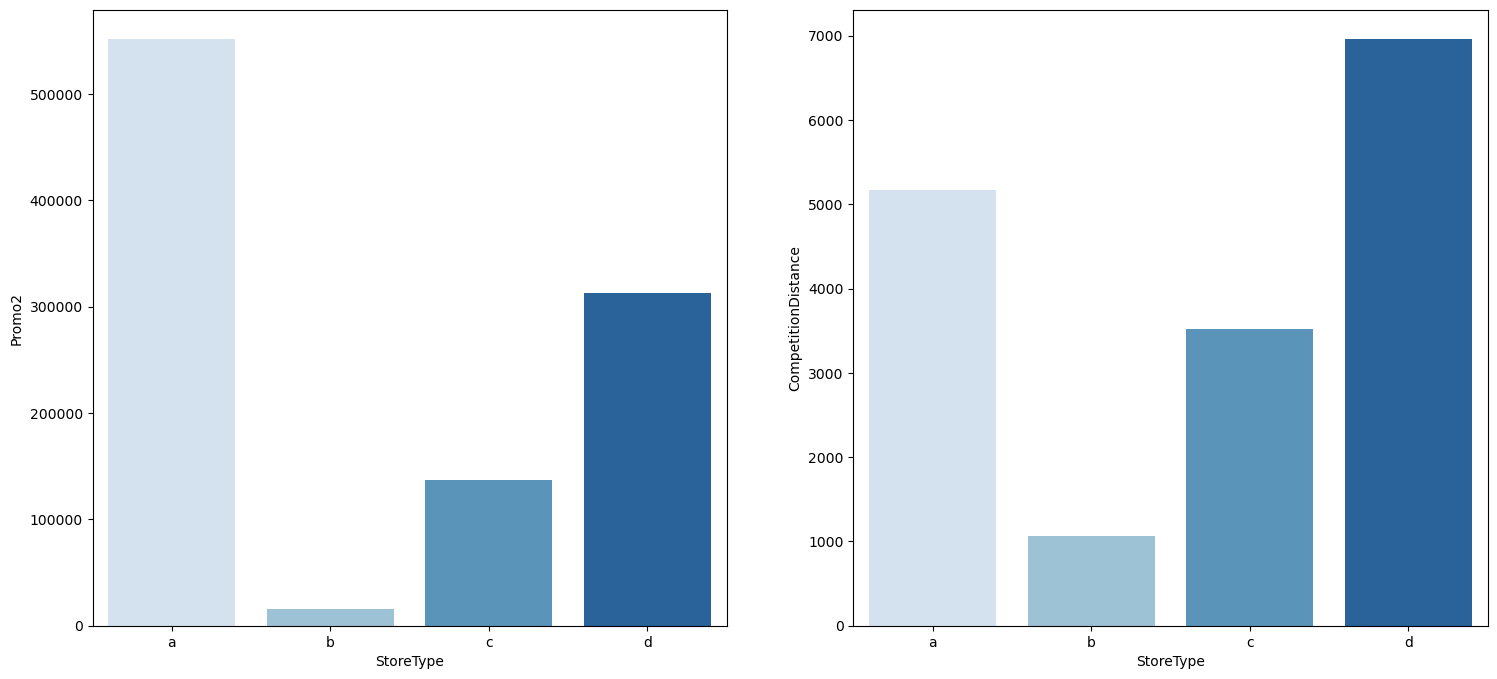

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
storetype_df = df.groupby(df.StoreType).count()
sns.barplot(storetype_df.index, storetype_df['Promo2'], ax=ax1, palette='Blues')
storetype_df = df.groupby(df.StoreType).mean()
sns.barplot(storetype_df.index, storetype_df['CompetitionDistance'], ax=ax2, palette='Blues')
plt.show()

In [88]:
df[['StateHoliday']].value_counts()

StateHoliday
0               855087
0               131072
a                20260
b                 6690
c                 4100
dtype: int64

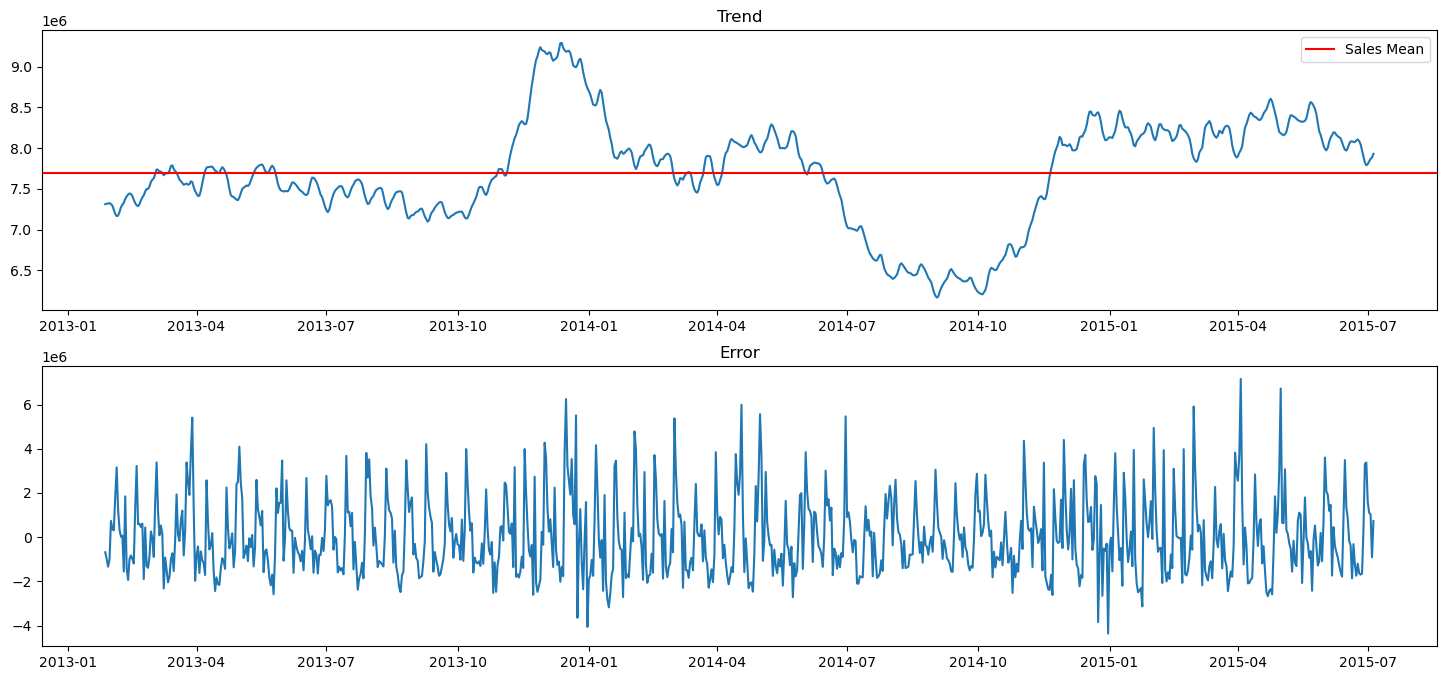

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
temp_df = df_train.copy()
temp_df.Date = pd.to_datetime(temp_df.Date)
temp_df.index = temp_df.Date
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')
temp_df = temp_df[['Sales']]
temp_df = temp_df.groupby(temp_df.index).sum()
result = seasonal_decompose(temp_df, model='additive',period=52)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,8))
ax1.plot(result.trend)
ax1.axhline(y = temp_df.Sales.mean(), color = 'r', linestyle = '-', label='Sales Mean')
ax1.set_title("Trend")
ax2.plot(result.resid)
ax2.set_title("Error")
ax1.legend()
plt.show()

2015 has been a good year as the trend line is above the average line by the end of 2014. Beginning of 2014 is a huge peak, I wonder what drived that?

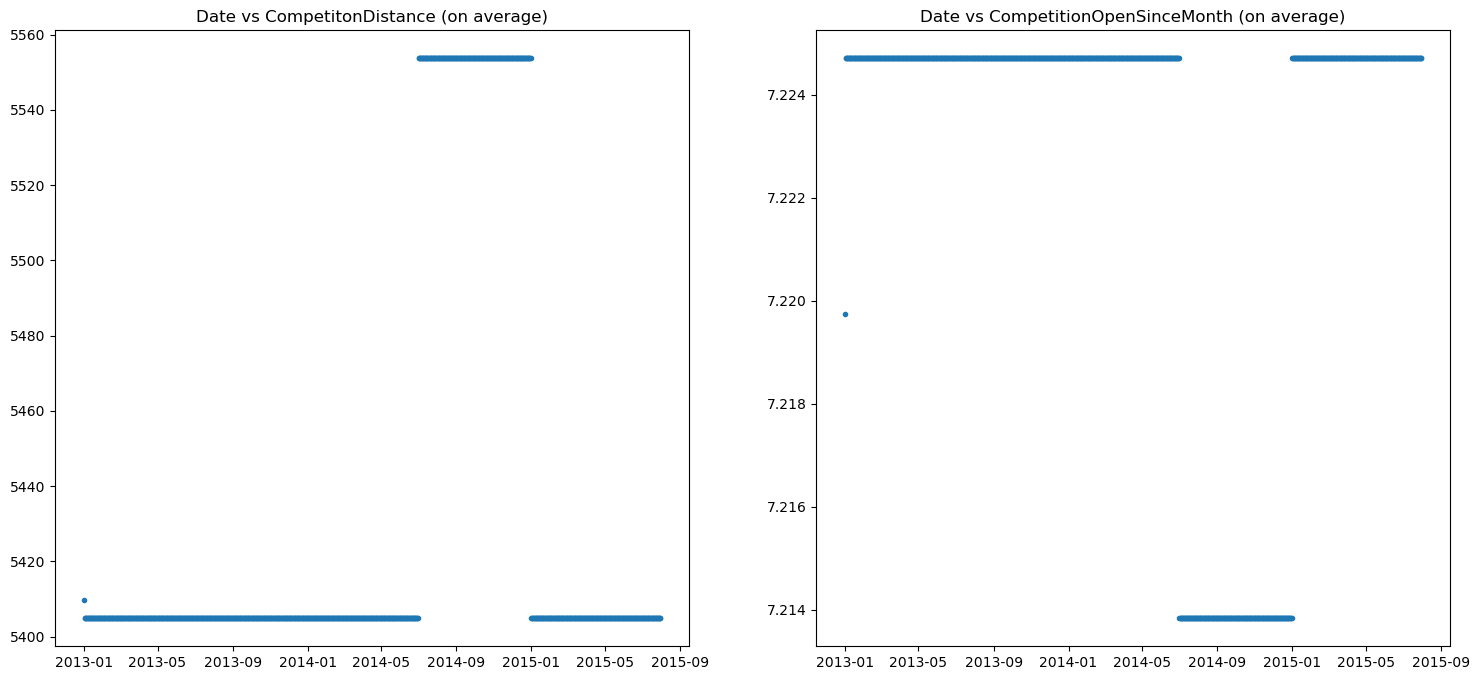

In [81]:
temp_df = df.copy()
temp_df.index = temp_df.Date
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')
temp_df = temp_df.groupby(temp_df.index).mean()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
ax1.plot(temp_df.CompetitionDistance, '.')
ax1.set_title("Date vs CompetitonDistance (on average)")
ax2.plot(temp_df.CompetitionOpenSinceMonth, '.')
ax2.set_title("Date vs CompetitionOpenSinceMonth (on average)")
plt.show()

Seems like there was a new competitor near the end of 2014 and since the distance also relatively increased it could be maybe change of location but these are just assumptions. It could be useful for the model to interpret such behaviour in the future for the stores.

I wonder if the stores had done less promos when the trend was going down. Lets see!

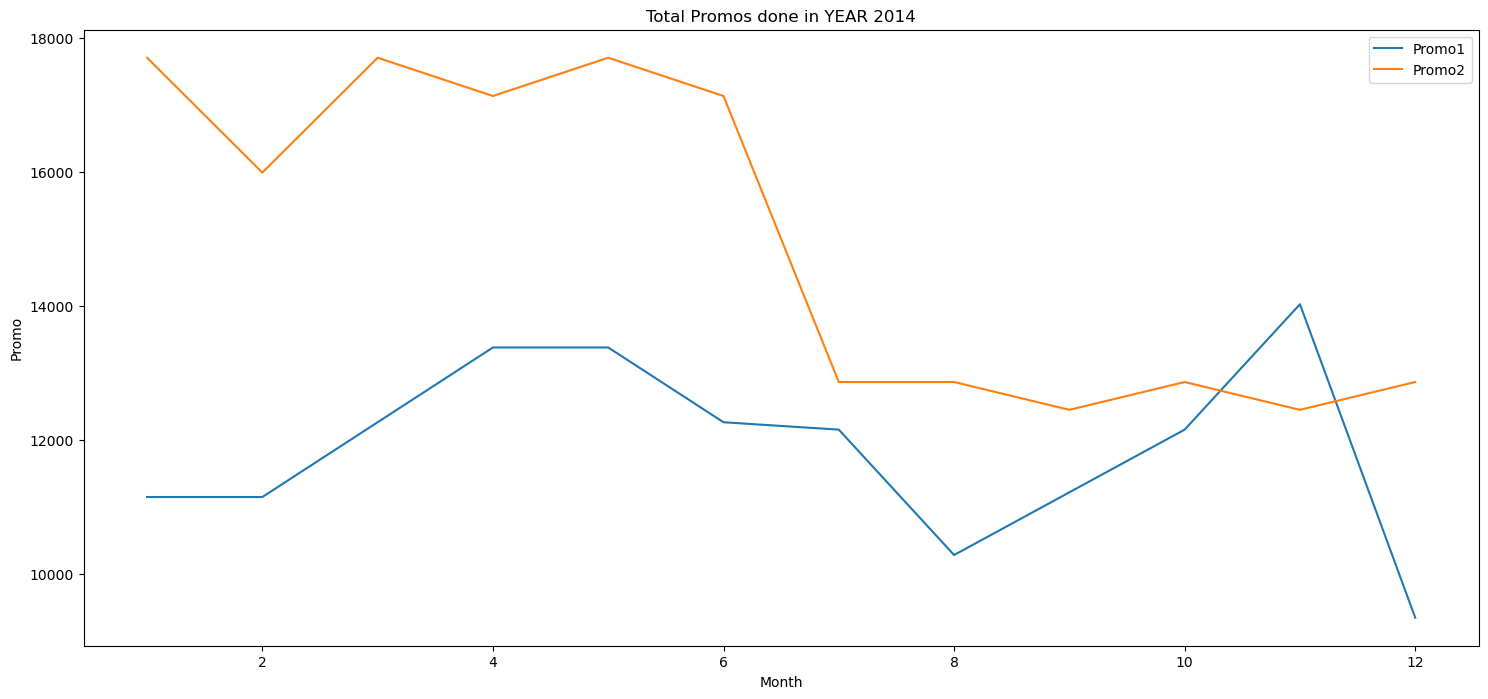

In [82]:
plt.figure(figsize=(18,8))
temp_df = df.copy()
temp_df.index = temp_df.Date
temp_df = temp_df[temp_df.Year==2014]
temp_df = temp_df.groupby(temp_df.Month).sum()
temp_df.Sales = temp_df.Sales.apply(lambda x: None if x == 0 else x)
temp_df.Sales = temp_df.Sales.fillna(method='ffill').fillna(method='bfill')

plt.title('Total Promos done in YEAR 2014')
sns.lineplot(temp_df.index, temp_df.Promo, palette='Blues', label='Promo1')
sns.lineplot(temp_df.index, temp_df.Promo2, palette='Blues', label='Promo2')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Open store on weekened Sales amount')

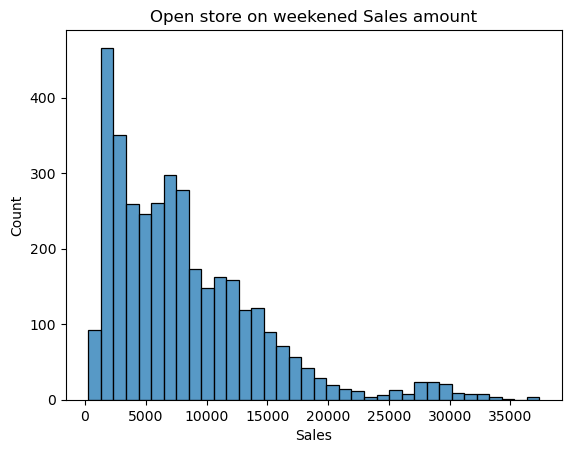

In [101]:
open_store_weekend = df_train.query("Open==1 & DayOfWeek==7")
open_store_weekend = open_store_weekend.sort_values(by='Date', ascending=False)

sns.histplot(data=open_store_weekend, x='Sales')
plt.title('Open store on weekened Sales amount')

<b>`Data Vizualization`<b>

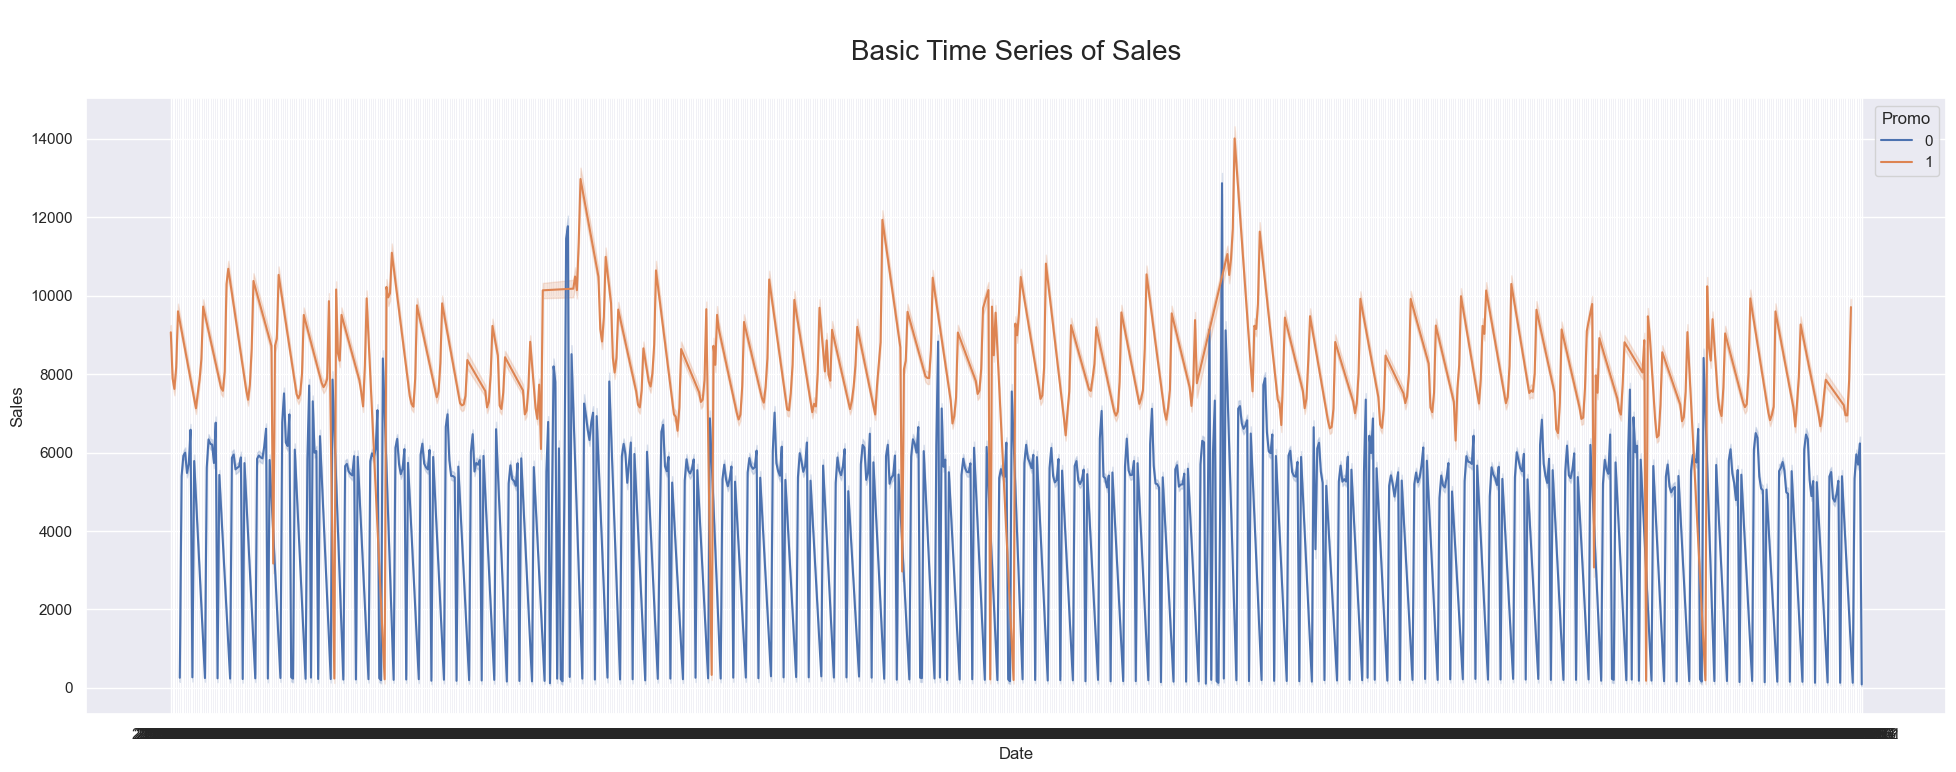

In [ ]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df_train,x='Date',y='Sales',hue='Promo')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

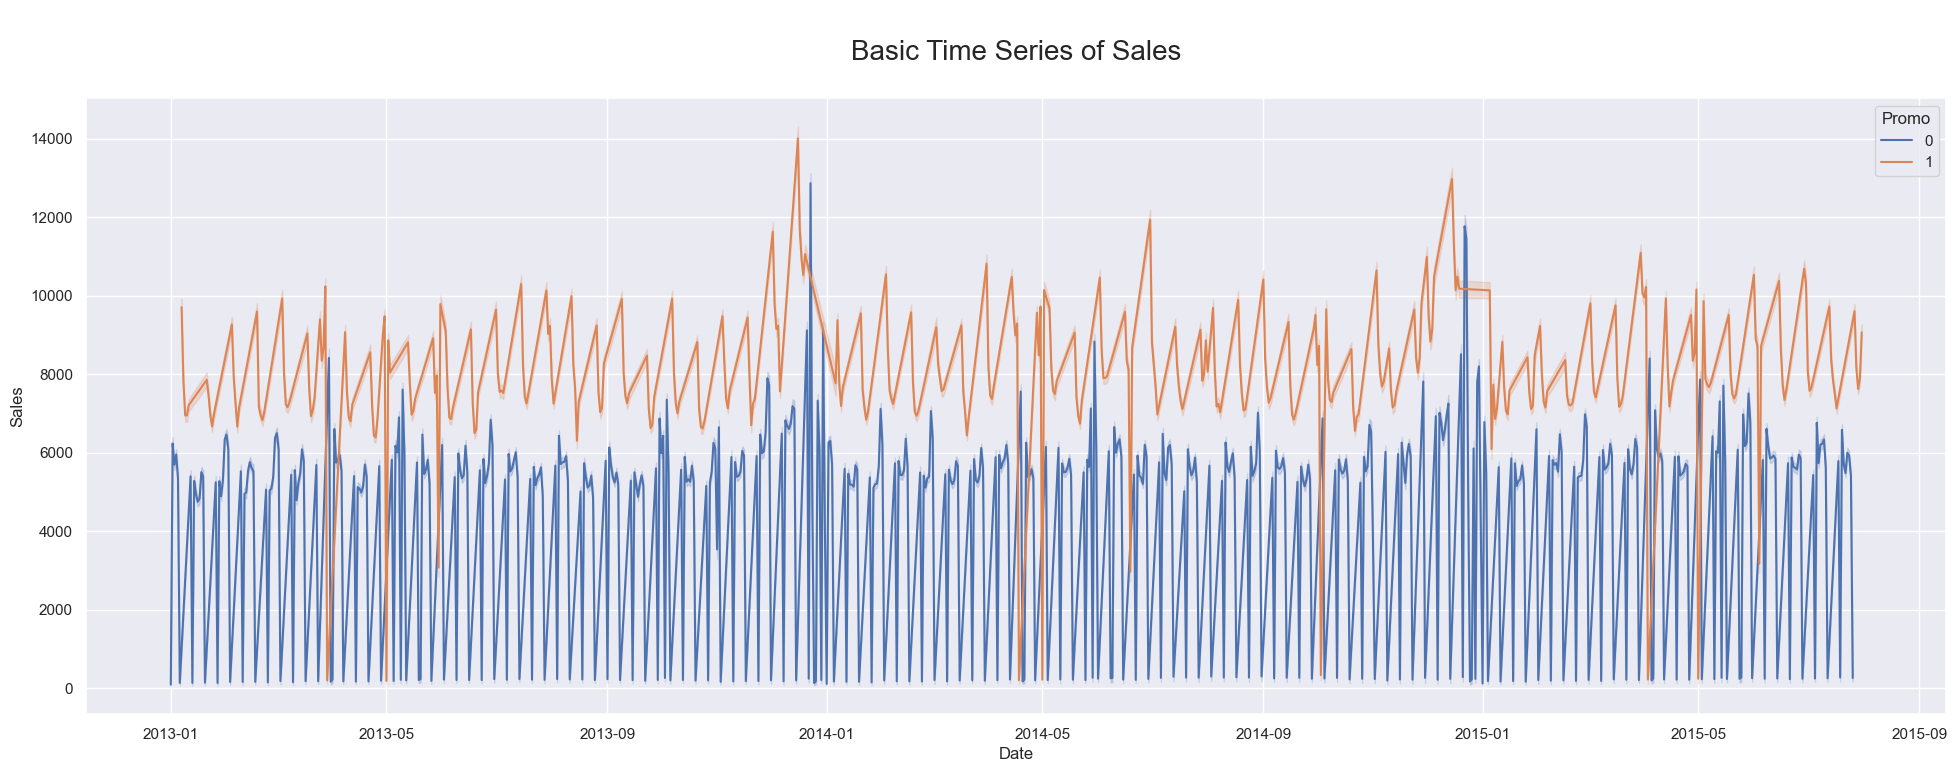

In [103]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df,x='Date',y='Sales',hue='Promo')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20);

we can basically see that when Prom is 1 the sales are higher than when Promo is 0

In [10]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [13]:
train.shape

(1017209, 8)

In [14]:
# Only want closing price for each day 
train_sales = pd.DataFrame(train["Sales"]).rename(columns={"Sales": "sales_per_date"})
train_sales.head()

,sales_per_date
Date,
2015-07-31,5263
2015-07-31,6064
2015-07-31,8314
2015-07-31,13995
2015-07-31,4822


let's plot everything we've got.

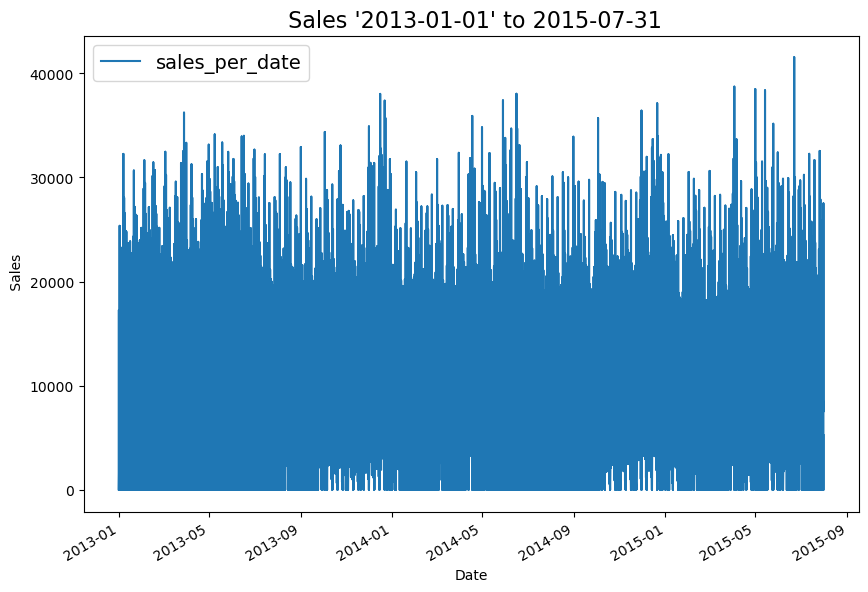

In [19]:
import matplotlib.pyplot as plt
train_sales.plot(figsize=(10, 7))
plt.ylabel(" Sales")
plt.title(" Sales '2013-01-01' to 2015-07-31", fontsize=16)
plt.legend(fontsize=14)

Too big to get a clear insight

In [27]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2b27931c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2b2793820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2b22b3eb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff2b2793d00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2b2793fd0>,
 'means': []}

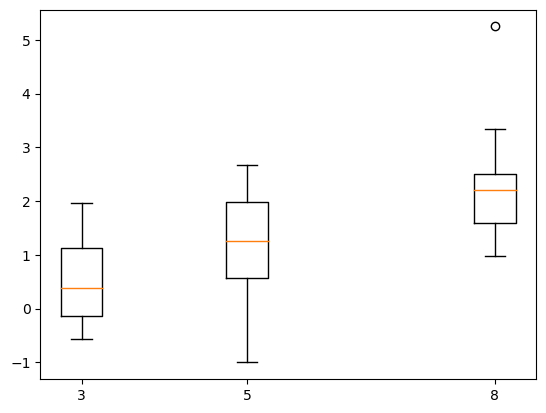

In [ ]:
np.random.seed(12345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
ii = np.array([ 3, 5, 8 ] )
df = pd.DataFrame( data=data, index=ii )
plt.boxplot( [ df.loc[i] for i in df.index ], vert=True, positions=ii )

In [ ]:
np.random.seed(345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
dates = pd.to_datetime( [ '2015-06-01', '2015-06-15', '2015-08-30' ] )
df = pd.DataFrame( data=data, index=dates )
df

,0,1,2,3,4,5,6,7,8,9
2015-06-01,1.469248,-1.150144,2.519226,-0.082478,-0.033601,-1.636656,-0.412092,1.784949,0.042383,-0.619732
2015-06-15,0.008309,1.136467,1.656681,0.503590,0.767424,1.379893,1.535374,-0.194115,-0.514435,1.116006
2015-08-30,2.259025,3.066208,1.559998,-0.147022,1.281347,1.543604,0.876745,1.361544,1.594094,2.395408


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2b2943670>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2b2943c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2b29433a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff2b417c1c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2b417c490>,
 'means': []}

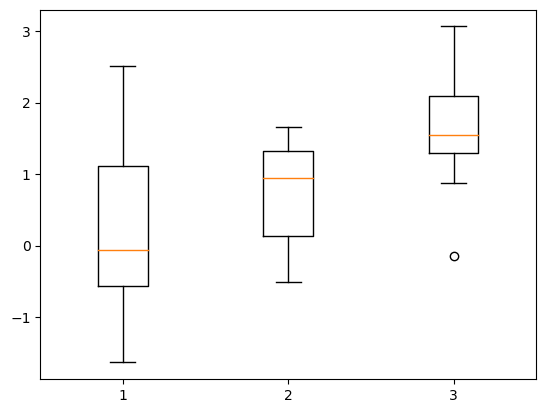

In [ ]:
plt.boxplot( [ df.loc[i] for i in df.index ], vert=True )

In [ ]:
np.random.seed(12345)
data = np.array( [ np.random.normal( i, 1, 10 ) for i in range(3) ] )
dates = pd.to_datetime( [ '2013-06-01', '2013-06-15', '2013-08-30' ] )
df = pd.DataFrame( data=data, index=dates )
df

,0,1,2,3,4,5,6,7,8,9
2013-06-01,-0.204708,0.478943,-0.519439,-0.555730,1.965781,1.393406,0.092908,0.281746,0.769023,1.246435
2013-06-15,2.007189,-0.296221,1.274992,1.228913,2.352917,1.886429,-1.001637,0.628157,2.669025,0.561430
2013-08-30,1.460259,2.476985,5.248944,0.978772,1.422913,2.124121,2.302614,2.523772,2.000940,3.343810


[Text(31, 0, '2013-06-01'),
 Text(45, 0, '2013-06-15'),
 Text(121, 0, '2013-08-30')]

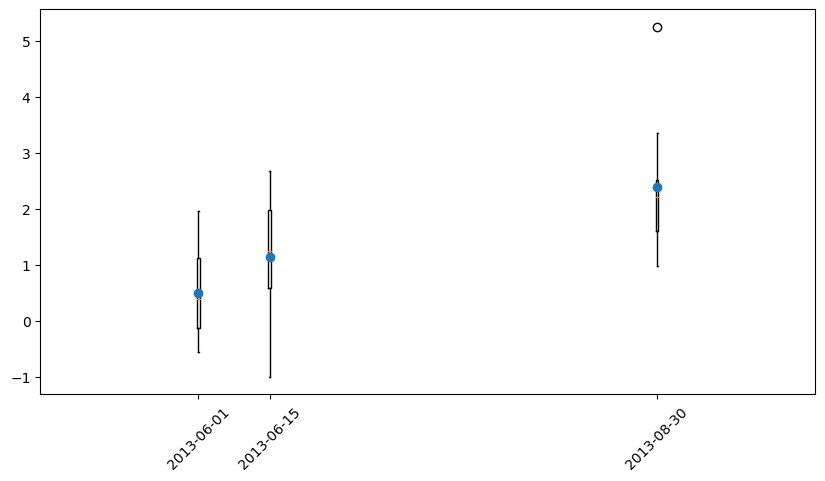

In [ ]:
fig, ax = plt.subplots( figsize=(10,5) )
x1 = pd.to_datetime( '2013-05-01' )
x2 = pd.to_datetime( '2013-09-30' )
pos = ( dates - x1 ).days

ax.boxplot( [ df.loc[i] for i in df.index ], vert=True, positions=pos )
ax.plot( pos, [ df.loc[i].mean() for i in df.index ], 'o' )

ax.set_xlim( [ 0, (x2-x1).days ] )
ax.set_xticklabels( dates.date, rotation=45 )

`How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance`

In [105]:
grouped_by_date = df.dropna()
grouped_by_date['CompetitionOpenDate'] = pd.to_datetime(grouped_by_date['CompetitionOpenSinceYear'].astype(
    'int').astype('str')+'-'+grouped_by_date['CompetitionOpenSinceMonth'].astype('int').astype('str'))
first_competition_date = grouped_by_date['CompetitionOpenDate'].iloc[0]
first_competition_date

Timestamp('2007-11-01 00:00:00')

In [ ]:
df_train['Date'].min()

'2013-01-01'